In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv")

In [3]:
df.head (20)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.5960,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.7380,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.3460,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.1290,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.2780,2022,11,1
5,7.0,4,3,755,142,4.578,26.0,660.000,-26.0442,178.3810,2022,11,1
6,6.8,1,3,711,136,4.678,22.0,630.379,-25.9678,178.3630,2022,11,1
7,6.7,7,6,797,145,1.151,37.0,20.000,7.6712,-82.3396,2022,10,1
8,6.8,8,7,1179,175,2.137,92.0,20.000,18.3300,-102.9130,2022,9,1
9,7.6,9,8,1799,271,1.153,69.0,26.943,18.3667,-103.2520,2022,9,1


In [4]:
df.dropna 

<bound method DataFrame.dropna of      magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0          7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1          6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2          7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3          7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4          6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   
..         ...  ...  ...  ...  ...    ...   ...      ...       ...        ...   
777        7.7    0    8  912  427  0.000   0.0   60.000   13.0490    -88.660   
778        6.9    5    7  745    0  0.000   0.0   36.400   56.7744   -153.281   
779        7.1    0    7  776  372  0.000   0.0  103.000  -14.9280    167.170   
780        6.8    0    5  711   64  0.000   0.0   33.000    6.6310    126.899   
781        7.5    0    7  865  324  0.000   0.0   33.000    6.8980    126.5

In [5]:
df.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


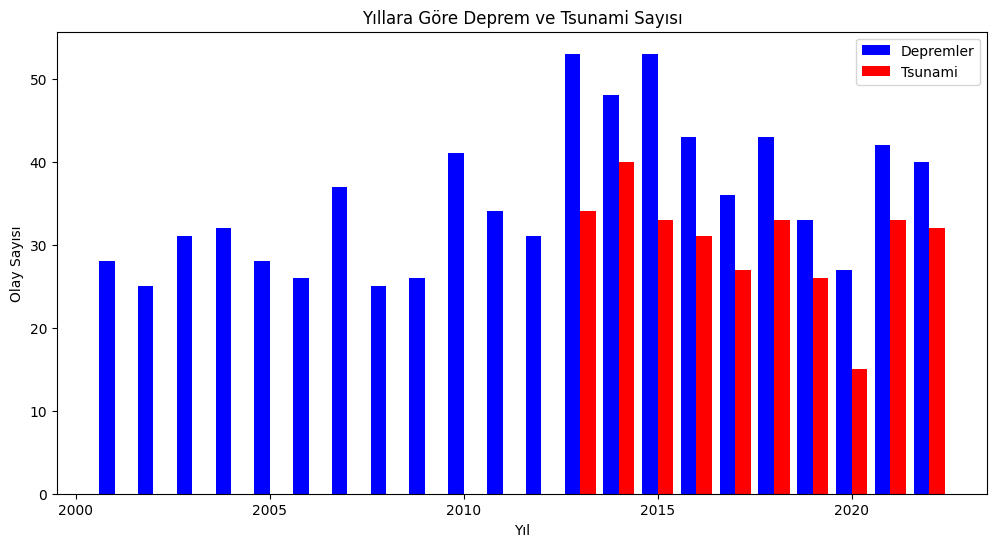

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Ülke sütunu yok, o yüzden enlem/ boylamı kullanarak kabaca bölgeleri gruplayabiliriz.
# Ama veri setinde 'Country' sütunu varsa onu kullan:
# df['Country'] kullanabiliriz. Şimdi varsayalım 'Country' sütunu yok, sadece deprem sayısı ve tsunami sayısı istiyoruz.

# Tsunami oluşmuş depremler
tsunami_counts = df[df['tsunami'] == 1].groupby('Year').size()

# Tüm depremler
quake_counts = df.groupby('Year').size()

# Basit çubuk grafiği
plt.figure(figsize=(12,6))
plt.bar(quake_counts.index-0.2, quake_counts.values, width=0.4, label='Depremler', color='blue')
plt.bar(tsunami_counts.index+0.2, tsunami_counts.values, width=0.4, label='Tsunami', color='red')
plt.xlabel("Yıl")
plt.ylabel("Olay Sayısı")
plt.title("Yıllara Göre Deprem ve Tsunami Sayısı")
plt.legend()
plt.show()

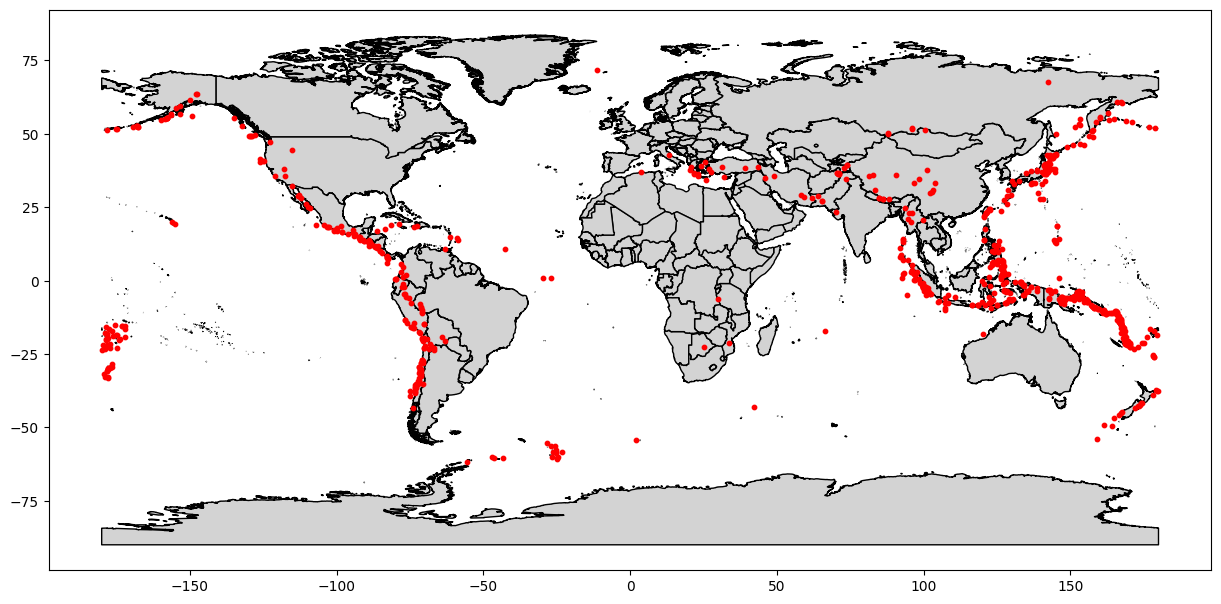

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Deprem noktalarını GeoDataFrame olarak oluştur
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Dünya haritasını GeoJSON üzerinden yükle
world = gpd.read_file("https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson")

# Harita çizimi
fig, ax = plt.subplots(figsize=(15,10))
world.plot(ax=ax, color='lightgray', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=10)
plt.show()

In [9]:
#Depremler dünya genelinde düzensiz dağılmış değil ,belirli teknotik sınırları takip ediyor.

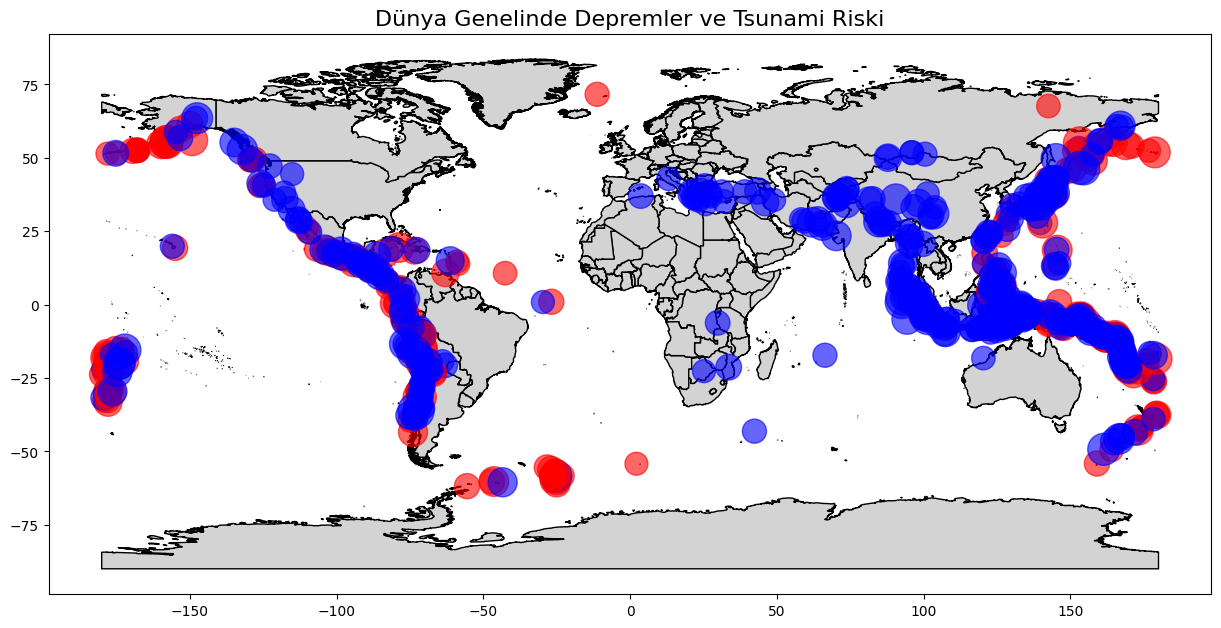

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

# GeoDataFrame oluştur
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Dünya haritasını yükle (GeoJSON)
world = gpd.read_file("https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson")

# Renk ve boyut ayarlamaları
# Tsunami = 1 ise kırmızı, 0 ise mavi
colors = gdf['tsunami'].map({0: 'blue', 1: 'red'})
# Nokta boyutu deprem büyüklüğüyle orantılı (magnitude^3 ile daha görünür)
sizes = gdf['magnitude'] ** 3

# Harita çizimi
fig, ax = plt.subplots(figsize=(15,10))
world.plot(ax=ax, color='lightgray', edgecolor='black')
gdf.plot(ax=ax, color=colors, markersize=sizes, alpha=0.6)

# Başlık ve açıklama
plt.title("Dünya Genelinde Depremler ve Tsunami Riski", fontsize=16)
plt.show()

In [11]:
#Kırmızı noltalar tsunami oluşmuş depremle,mavi noktalar tsunami oluşmamış depremler
#Nokta büyüklüğü depremin büyüklüğü ile ilgili
